# Basics of DBSCAN (Density-based Spatial Clustering of Applications with Noise)
- runs at O(n2) unlike the old n3
- we can use as an alternative of K-means clustering
- it focuses on the DENSITY of points
- K-means cannot work for all use cases (two moons use case)
- epsilon: distance extended from a point.
- DBSCAN has 3 point types:
    - core
    - border
    - outlier
- starts with a core point and continues along finding border points
- very powerfull to cluster based on density! https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
blobs_df = pd.read_csv('../DATA/cluster_blobs.csv')

In [3]:
blobs_df.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

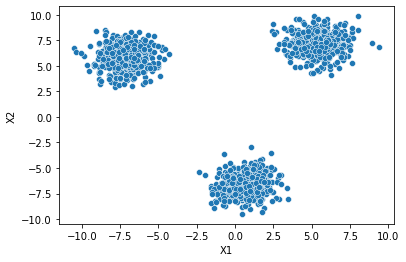

In [4]:
sns.scatterplot(data=blobs_df, x='X1', y='X2')

In [5]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

In [6]:
moons

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


<AxesSubplot:xlabel='X1', ylabel='X2'>

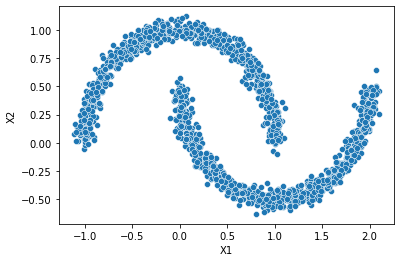

In [7]:
sns.scatterplot(data=moons, x='X1', y='X2') # Cluster algorithm needs to recognise the shape of the moons

In [8]:
circles = pd.read_csv('../DATA/cluster_circles.csv')

In [9]:
circles

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354
...,...,...
1495,-0.297506,0.077834
1496,0.082555,-0.270371
1497,0.279533,-0.109435
1498,0.027432,-0.264891


<AxesSubplot:xlabel='X1', ylabel='X2'>

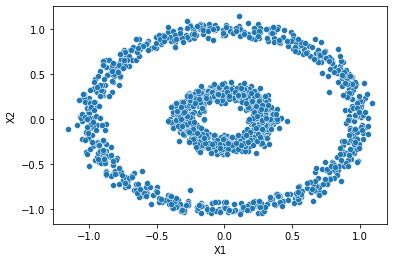

In [10]:
sns.scatterplot(data=circles, x='X1', y='X2')

In [11]:
def display_categories(model, dataset):
    labels = model.fit_predict(dataset)
    sns.scatterplot(data=dataset, x='X1', y='X2', hue=labels, palette='Set1')

In [12]:
from sklearn.cluster import KMeans

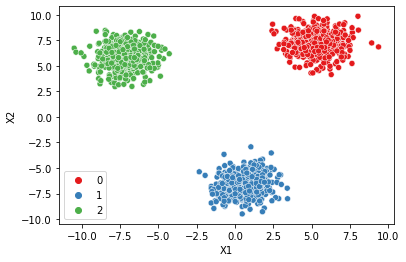

In [15]:
display_categories(KMeans(n_clusters=3), blobs_df)

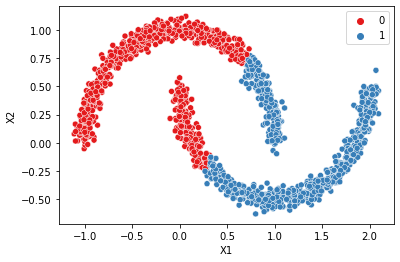

In [17]:
display_categories(KMeans(n_clusters=2), moons) # K means is using distance of metric NOT density, it is clustering here incorrectly!

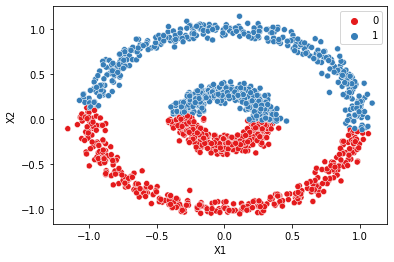

In [18]:
display_categories(KMeans(n_clusters=2), circles)

In [19]:
from sklearn.cluster import DBSCAN

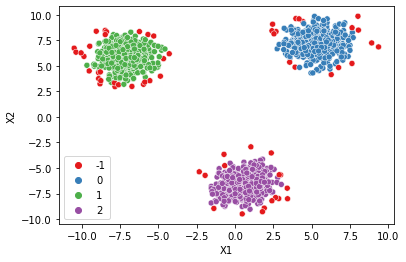

In [21]:
display_categories(DBSCAN(), blobs_df) # -1 are "outliers" for the clusters (guys on the edge, they are not close enough to the core given the params)

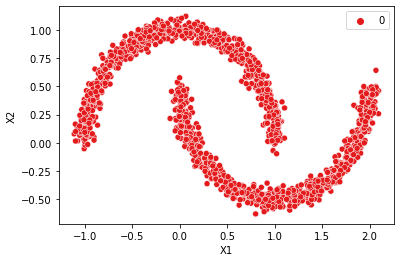

In [22]:
display_categories(DBSCAN(), moons)

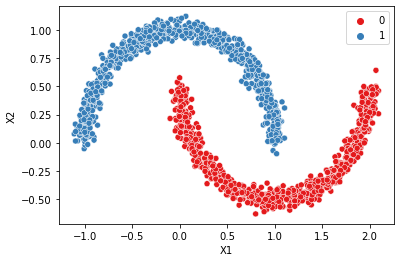

In [23]:
display_categories(DBSCAN(eps=0.15), moons)

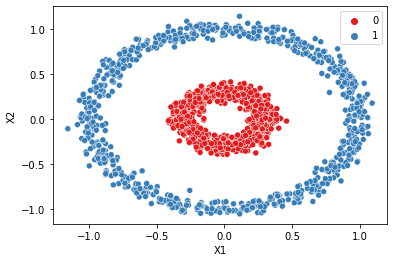

In [24]:
display_categories(DBSCAN(eps=0.15), circles)

# Hyperparams
- increasing epsilon allows more points to be core points which also results in more border points and less outlier points.

In [25]:
# Hyperparameter search

In [26]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

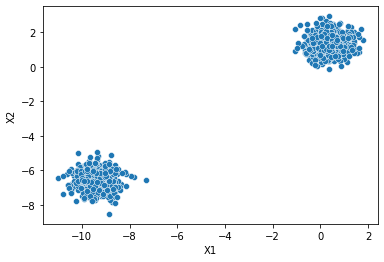

In [27]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

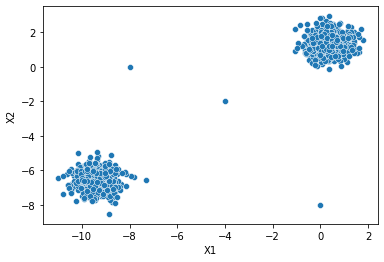

In [28]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [29]:
dbscan = DBSCAN()

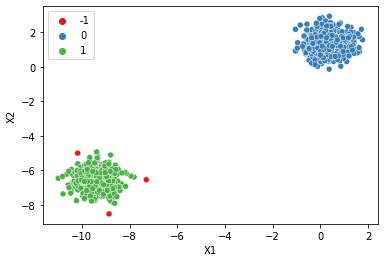

In [30]:
display_categories(DBSCAN(), two_blobs)

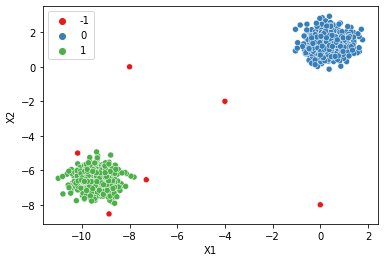

In [31]:
display_categories(DBSCAN(), two_blobs_outliers)

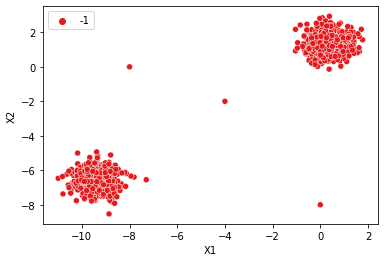

In [33]:
display_categories(DBSCAN(eps=0.001), two_blobs_outliers) # No point is discovering any other point within epsilon distance!

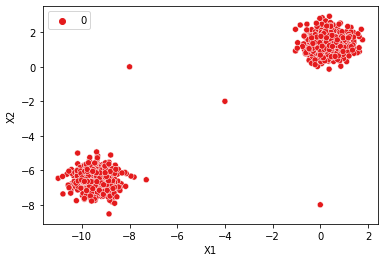

In [34]:
display_categories(DBSCAN(eps=10), two_blobs_outliers) # Opposite now

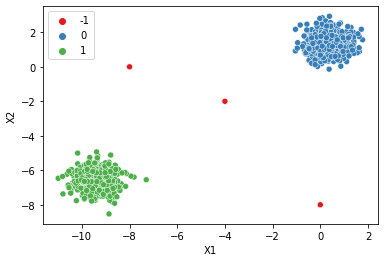

In [36]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers) # Opposite now

In [38]:
outliers = np.sum(dbscan.labels_ == -1) # Count ALL outliers
100 * outliers / len(dbscan.labels_) # Percent of outliers

0.29910269192422734

In [47]:
outlier_percent = []
number_of_outliers = []
labels = []

for eps in np.linspace(0.001, 7, 200):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    out = np.sum(dbscan.labels_ == -1) # Total num outliers found
    number_of_outliers.append(out)
    outlier_percent.append(100 * out / len(dbscan.labels_))
                           
    labels.append(len(np.unique(dbscan.labels_))) # Get unique labels (cluster count)

(0.0, 2.0)

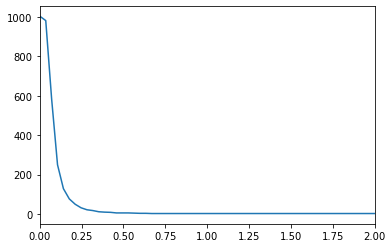

In [48]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y = number_of_outliers)
plt.xlim(0, 2)

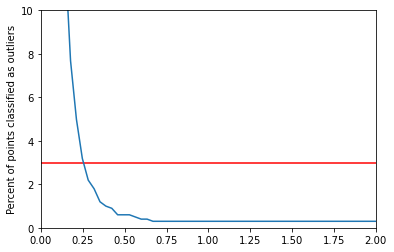

In [52]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y = outlier_percent)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.ylabel('Percent of points classified as outliers')
plt.hlines(y=3, xmin=0, xmax=2, color='red')

In [53]:
outlier_percent = []
number_of_outliers = []
labels = []

for n in np.arange(1, 100):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    out = np.sum(dbscan.labels_ == -1) # Total num outliers found
    number_of_outliers.append(out)
    outlier_percent.append(100 * out / len(dbscan.labels_))
                           
    labels.append(len(np.unique(dbscan.labels_))) # Get unique labels (cluster count)

Text(0, 0.5, 'Pct. of points as outlier')

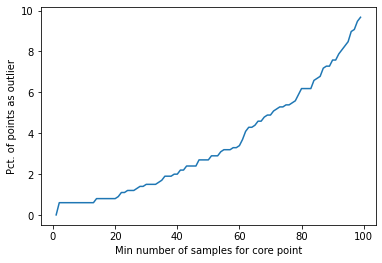

In [55]:
sns.lineplot(x=np.arange(1, 100), y = outlier_percent)
plt.xlabel('Min number of samples for core point')
plt.ylabel('Pct. of points as outlier')

In [57]:
# General rule for min samples should be dimension of data * 2
num_dimensions = two_blobs.shape[1]